In [1]:
# run before presenting to create population
# create virtual box
options(repr.matrix.max.rows = 6)
library(tidyverse)
set.seed(1)
virtual_ugrads <- tibble(student_id = seq(1, 50000, by = 1),
                     phone_type = factor(rbinom(50000, 1, 0.63),
                     labels = c("other", "iphone")))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## DSCI 100 - Introduction to Data Science

### Lecture 11 - Introduction to inference & sampling

<img src="https://tinystats.github.io/teacups-giraffes-and-statistics/images/02_bellCurve/giraffe_lineup4.jpg" width=600>

Source: [Desirée De Lyon's Tea cup Giraffe's statistics course](https://tinystats.github.io/teacups-giraffes-and-statistics/02_bellCurve.html)

## Reminders

- Final exam (quiz 3) June 26 12:00PM (Noon PDT) -- All sections!
    - Section 002: PHRM 1101


- Be respectful and polite.

## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-1.png" width=1100>


## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-2.png" width=1100>

## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-3.png" width=1100>

## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-4.png" width=1100>

- **Population:** collection of all possible observations + their frequency/count
    - e.g. the widths of the entire population of sea stars

- **Sample:** a randomly selected subset of observations
    - e.g. I randomly pick 50 sea stars and record their widths

- **Statistic:** something I compute using my sample
    - e.g. the mean width of the sea stars *in my sample*

- **Inference:** using the sample to make a conclusion about the whole population, and *knowing how uncertain you are* about your conclusion

## Inference in the wild: opinion polling

Based on the results of a recent Reuters poll, we estimate that 47.2% of Americans think that firearms should have strong regulations or restrictions when thinking about gun ownership rights and gun laws.

source: http://polling.reuters.com/#!response/PV20/type/smallest/dates/20180505-20181002/collapsed/true

acquiescence bias: (from wikipedia): Acquiescence bias, also known as agreement bias,
is a category of response bias common to survey research in which respondents have a tendency to select a positive response option or indicate a positive connotation disproportionately more frequently.

See also: NYTimes Daily episode: "Why Polling on Gun Control Gets It Wrong"
https://www.nytimes.com/2022/06/07/podcasts/the-daily/gun-control-polling.html

## Inference in the wild: market assessment

What proportion of undergraduate students have an iphone?

<img img align="left" src="https://media.wired.com/photos/5b22c5c4b878a15e9ce80d92/master/w_582,c_limit/iphonex-TA.jpg" width="500"/>

## Inference in the wild: A/B testing

*(not in DSCI100 - you'll need to take a more advanced DSCI or STAT class for this!)*

Which of the 2 website designs will lead to more customer engagement (measured by click-through-rate, for example)?

<img img align="left" src="https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png" width="600"/>

source: https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png

## Estimation

A particular inferential problem where we try to *estimate a quantitative property* of the population

This quantitative property is called a **population parameter**

**Question:** What *proportion* (a quantitative population parameter!) of UBC  undergrads have an iphone?
<img align="left" src="img/sampling.001.jpeg" width="700"/>

## Estimation

Step 1: randomly select a subset (a *sample*) and ask them if they have an iPhone

Step 2: calculate the proportion in our sample (a *statistic* or *point estimate*) and use it as an estimate of the true population proportion.

<img align="left" src="img/sampling.002.jpeg" width="700"/>

# Virtual simulation experiment

Let's simulate this process to see how well sample estimates reflect the true population parameter!

**Question:** What proportion of UBC undergrads have an iPhone?

<img img align="left" src="https://www.ubc.ca/_assets/img/okanagan-undergraduates-1920x700.jpg" width = 800/>

- Let's create a virtual group of students (our population) where 63% of the students have iPhones
- Then:
    - collect a random sample of 40 students, 
    - calculate a proportion of students with iPhones
   


### As always, load the libraries we'll be using:

In [2]:
# load libraries for wrangling and plotting
library(dplyr)
library(infer) 

Warning message:
“package ‘infer’ was built under R version 4.0.3”



### 1. Our virtual UBC students (population)

Let's examine our population of 50,000 students. Remember that the true proportion of iPhone users is 63%.

In [10]:
virtual_ugrads

student_id,phone_type
<dbl>,<fct>
1,iphone
2,iphone
3,iphone
⋮,⋮
49998,iphone
49999,iphone
50000,iphone


Check that the virtual population contains ~ 63% iPhone users:

In [11]:
virtual_ugrads %>% 
    group_by(phone_type) %>% 
    summarize(n = n(),
             proportion = n() / 50000)

`summarise()` ungrouping output (override with `.groups` argument)



phone_type,n,proportion
<fct>,<int>,<dbl>
other,18480,0.3696
iphone,31520,0.6304


### 2. Drawing a single sample of size 40

Let's simulate taking one random sample from our virtual undergrad population. We will use the `rep_sample_n` function from the `infer` package:

In [13]:
# draw a single sample from the virtual population
student_sample <- rep_sample_n(virtual_ugrads, size = 40)
student_sample

replicate,student_id,phone_type
<int>,<dbl>,<fct>
1,45917,other
1,7801,iphone
1,3390,iphone
⋮,⋮,⋮
1,34576,other
1,40770,iphone
1,6692,iphone


```
# function signature:
# rep_sample_n(tbl, size, replace = FALSE, reps = 1, prob = NULL)

student_sample <- rep_sample_n(virtual_ugrads, size = 40)
student_sample
```

We can tell by the `student_id` column that R indeed did what we asked - randomly selected 40 students from our virtual population.

### What is the proportion of iPhone users in our sample?

Is it close to the population proportion?

In [19]:
# compute the proportion of iPhone users
iphone_estimate_1 <- student_sample %>%
    summarize(n = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_1

`summarise()` ungrouping output (override with `.groups` argument)



replicate,n,prop
<int>,<int>,<dbl>
1,24,0.6


```
iphone_estimate_1 <- student_sample %>%
    summarize(student_sample, n = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_1
```

### What happens if we were to take another sample?

Would the sample proportion be the same?

In [20]:
# random sample from virtual population
iphone_estimate_2 <- virtual_ugrads %>%
    rep_sample_n(size = 40) %>% 
    summarize(n = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_2

`summarise()` ungrouping output (override with `.groups` argument)



replicate,n,prop
<int>,<int>,<dbl>
1,26,0.65


```
iphone_estimate_2 <- virtual_ugrads %>%
    rep_sample_n(size = 40) %>% 
    summarize(n = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_2
```

### What about another?

In [21]:
# random sample from virtual student population
iphone_estimate_3 <- virtual_ugrads %>%
    rep_sample_n(size = 40) %>% 
    summarize(n = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_3

`summarise()` ungrouping output (override with `.groups` argument)



replicate,n,prop
<int>,<int>,<dbl>
1,25,0.625


```
iphone_estimate_3 <- rep_sample_n(virtual_ugrads, size = 40) %>% 
    summarize(n = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_3
```

### What values do we expect when we sample?

In [22]:
iphone_estimate_1
iphone_estimate_2
iphone_estimate_3


replicate,n,prop
<int>,<int>,<dbl>
1,24,0.6


replicate,n,prop
<int>,<int>,<dbl>
1,26,0.65


replicate,n,prop
<int>,<int>,<dbl>
1,25,0.625


## Sampling distribution

The *distribution* of estimates you get by taking many samples *of a fixed sample size* is called the **sampling distribution**.



In [24]:
# take many samples from virtual student population
replicates <- virtual_ugrads %>%
   rep_sample_n(size = 40, reps = 10000)  %>% 
   group_by(replicate)  %>% 
   summarize(proportion = sum(phone_type == "iphone")/40)

`summarise()` ungrouping output (override with `.groups` argument)



```
replicates <- virtual_ugrads %>%
   rep_sample_n(size = 40, reps = 10000)  %>% 
   group_by(replicate)  %>% 
   summarize(proportion = sum(phone_type == "iphone")/40)
```

## Sampling distribution

The *distribution* of estimates you get by taking many samples *of a fixed sample size* is called the **sampling distribution**.

How did we do? How reliable is our sample estimate? Should we do anything to change it?



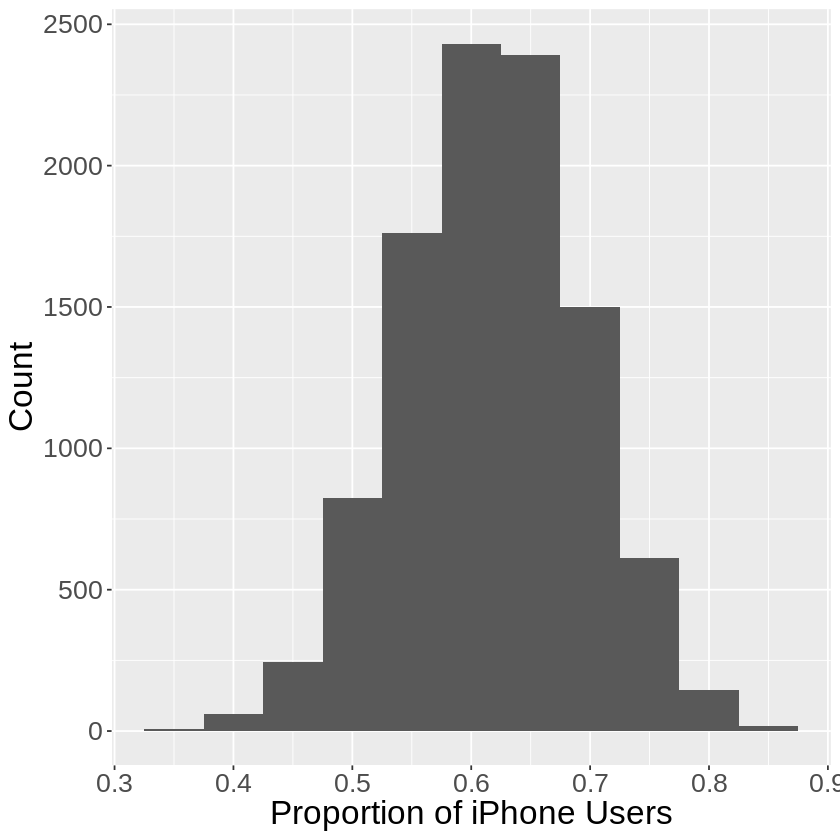

In [25]:
ggplot(replicates, aes(x = proportion)) +
    geom_histogram(binwidth = .05) +
    labs(x = "Proportion of iPhone Users", y = "Count") +
    theme(text = element_text(size=20))

## Worksheet time - go for it!

<img align="left" src="https://media.giphy.com/media/CjmvTCZf2U3p09Cn0h/giphy.gif" width="500"/>

### Go to Canvas, and fill out the survey `iphone_poll` in week 11!

### True or False:
1. A larger sample will give a more accurate sample statistic.
2. If our population is only size 20, we should just measure all the observations instead of sampling.
3. In order to understand how reliable our sample estimate is, we can take many *replicates* and see how the estimate varies.
4. UBC has implanted a secret microchip in all of your brains to know whether or not you have an iPhone, and so doesn't need to sample.

### Let's vote! Which of these are these proportion values? 
- parameters
- statistics 
- samples
- populations

# Acknowledgements
- [Data Science in a box](https://github.com/rstudio-education/datascience-box) by Mine Cetinkaya-Rundel
- [Inference in 3 hours](https://github.com/AllenDowney/CompStats) by Allan Downey
- [Modern Dive: An Introduction to Statistical and Data Sciences via R](https://moderndive.com/index.html) by Chester Ismay and Albert Y. Kim